# IE582 Homework 1
Fethi Kahvecioğlu - 2019402051

## Preparing Data

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
# load input and output data
folder = "./hw1_files/"
design_params = pd.read_csv(folder + 'hw1_input.csv')
s11_real = pd.read_csv(folder + 'hw1_real.csv')
s11_img = pd.read_csv(folder + 'hw1_img.csv')

In [3]:
# display a summary of the design parameters data
display(design_params.describe())

,length of patch,width of patch,height of patch,height of substrate,height of solder resist layer,radius of the probe,c_pad,c_antipad,c_probe,dielectric constant of substrate,dielectric constant of solder resist layer
count,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000
mean,3.569210,3.536983,0.024273,0.347643,0.060065,0.032198,0.012797,0.060648,0.245586,3.704384,3.521911
std,0.966173,1.182100,0.008800,0.272738,0.023670,0.010352,0.007111,0.021503,0.111245,0.853877,0.871233
min,1.805658,1.801273,0.010008,0.100321,0.020039,0.015012,0.000003,0.025292,0.050810,2.023380,2.001679
25%,2.755534,2.501163,0.016194,0.126901,0.038689,0.023389,0.006985,0.042011,0.148565,2.998152,2.783710
50%,3.637716,3.215396,0.024198,0.155254,0.060764,0.030979,0.012454,0.060532,0.245049,3.866295,3.480916
75%,4.369311,4.829731,0.031688,0.649324,0.080247,0.041819,0.019014,0.078227,0.340203,4.375551,4.278575
max,5.199919,5.198689,0.039843,0.799082,0.099728,0.049960,0.024996,0.099945,0.449599,4.999324,4.999950


,length of patch,width of patch,height of patch,height of substrate,height of solder resist layer,radius of the probe,c_pad,c_antipad,c_probe,dielectric constant of substrate,dielectric constant of solder resist layer
length of patch,1.000000,-0.114174,-0.026032,-0.064344,0.044502,-0.069905,-0.005560,-0.009627,0.081735,-0.037448,-0.014496
width of patch,-0.114174,1.000000,0.091726,0.923739,-0.021056,0.035675,-0.044198,-0.013358,0.029999,0.442193,0.038746
height of patch,-0.026032,0.091726,1.000000,0.082833,0.036045,0.030689,0.002422,0.037583,0.031592,-0.044318,-0.037769
height of substrate,-0.064344,0.923739,0.082833,1.000000,-0.011870,0.017410,-0.031571,-0.009432,0.044166,0.459847,0.002421
height of solder resist layer,0.044502,-0.021056,0.036045,-0.011870,1.000000,-0.012756,-0.018044,-0.017071,0.024842,-0.010967,-0.038405
radius of the probe,-0.069905,0.035675,0.030689,0.017410,-0.012756,1.000000,0.002906,-0.000523,0.048088,-0.025728,0.007524
c_pad,-0.005560,-0.044198,0.002422,-0.031571,-0.018044,0.002906,1.000000,0.067678,-0.015500,-0.049318,0.015284
c_antipad,-0.009627,-0.013358,0.037583,-0.009432,-0.017071,-0.000523,0.067678,1.000000,-0.132321,-0.016741,0.067821
c_probe,0.081735,0.029999,0.031592,0.044166,0.024842,0.048088,-0.015500,-0.132321,1.000000,0.015640,-0.029101
dielectric constant of substrate,-0.037448,0.442193,-0.044318,0.459847,-0.010967,-0.025728,-0.049318,-0.016741,0.015640,1.000000,0.060402


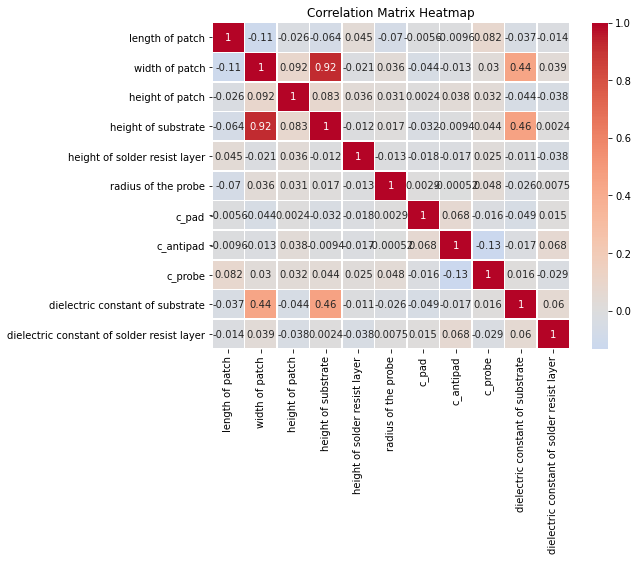

In [4]:
# show the correlation matrix as heatmap
correlation_matrix = design_params.corr()
display(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

## PCA

- The PCA analysis in below tells that the first eight principal components capture approximately 86% of the dataset’s total variance, a substantial proportion that justifies using these PCs as a sufficient summary of the data.


,Principal Component,Explained Variance Ratio,Cumulative Explained Variance Ratio
0,PC1,0.207153,0.207153
1,PC2,0.110708,0.317862
2,PC3,0.100034,0.417896
3,PC4,0.096072,0.513968
4,PC5,0.091871,0.605839
5,PC6,0.088458,0.694297
6,PC7,0.085659,0.779956
7,PC8,0.081651,0.861607
8,PC9,0.073399,0.935005
9,PC10,0.058303,0.993308


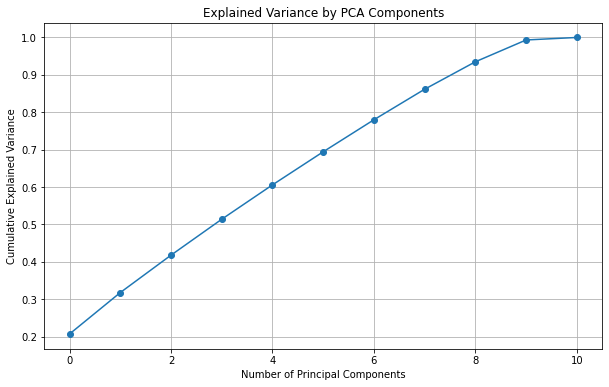

In [5]:
# normalize the data
scaler = StandardScaler()
design_params_normalized = scaler.fit_transform(design_params)

# perform PCA
pca = PCA()
principal_components = pca.fit_transform(design_params_normalized)

# display the explained variance ratio in a DataFrame and plot it
explained_variance_ratio = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(pca.explained_variance_ratio_))],
    'Explained Variance Ratio': pca.explained_variance_ratio_,
    'Cumulative Explained Variance Ratio': np.cumsum(pca.explained_variance_ratio_)
})

display(explained_variance_ratio)

# plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()

In [6]:
# Display the loadings
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(len(pca.explained_variance_ratio_))],
                        index=design_params.columns)
display(loadings)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
length of patch,-0.101327,-0.315409,-0.369645,0.376883,-0.409833,0.073314,-0.253331,-0.454266,-0.406238,-0.036934,-0.036141
width of patch,0.624178,0.009718,0.040766,0.039631,-0.012169,-0.032326,0.000413,-0.022090,-0.040157,-0.328516,-0.704172
height of patch,0.071054,-0.055716,0.620460,0.392974,-0.017701,0.069714,-0.490098,0.317943,-0.216559,0.243013,0.006071
height of substrate,0.624137,-0.018824,0.016441,0.076518,-0.028012,-0.060565,0.002837,-0.059481,-0.038186,-0.305362,0.708004
height of solder resist layer,-0.021049,-0.266259,0.086417,0.510652,0.124629,0.459841,0.647199,0.110408,0.040184,-0.027430,-0.004432
radius of the probe,0.025997,-0.002815,0.548381,-0.454397,-0.218986,0.304908,0.212779,-0.491478,-0.240280,0.080764,0.010532
c_pad,-0.054228,0.265990,0.144827,0.177533,-0.580059,-0.547579,0.429976,0.174386,-0.140321,0.049041,-0.010954
c_antipad,-0.018720,0.559499,0.088323,0.373926,-0.127759,0.172140,-0.138146,-0.415883,0.548589,-0.000574,-0.006460
c_probe,0.039213,-0.564753,0.093131,-0.151004,-0.487544,0.016285,-0.102528,0.129279,0.618694,0.000912,-0.008289
dielectric constant of substrate,0.445100,0.012829,-0.256167,-0.022492,-0.012254,0.027772,0.097290,-0.053226,0.031927,0.849121,-0.018678


## Regression

There are two output files, these files are used to get single magnitude output as: sqrt(real^2 + imaginary^2)

To perform the regression, the first thing to do is to choose 'important' frequency points since working with all 201 freq. points is computationally hard. To choose the first 5-10 important freq. points, I decided to use one of the following methods:

1. Taking mean of the every freq. points, and choose the lowest-mean freq. points
2. For every simulation (row), give 5 pts for the lowest freq. points, 3 for the second, 1 for the third, and 0 for the rest.

In the regression, two approaches were applied and results of both are printed in the code:
1. All the rows are used.
2. The rows that has all values above the given threshold (red line at the below graph) are dropped. The reason is that such cases (such as 'Simulation 5') may be an outlier since there is no visual dropping point as opposed to 'Simulation 3'.

Option 2 results in increase in the MSE and decrease in R-squared, so the option 1 is selected.

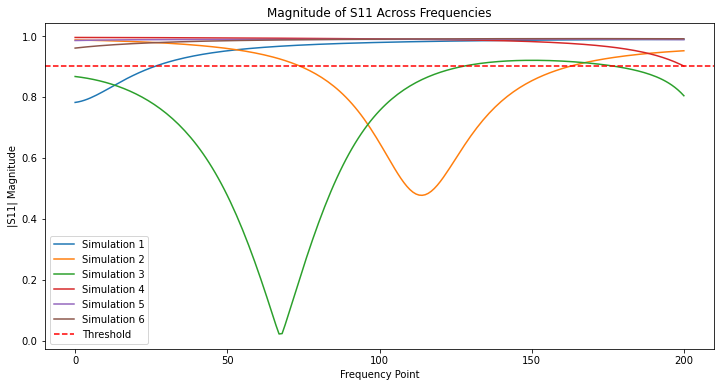

In [ ]:
# Calculate the magnitude of S11 at each frequency
s11_magnitude = np.sqrt(s11_real**2 + s11_img**2)

# Plot the magnitude across all frequencies for a random subset of simulations
plt.figure(figsize=(12, 6))
for i in range(6):
    plt.plot(s11_magnitude.iloc[i, :], label=f'Simulation {i+1}')
plt.xlabel('Frequency Point')
plt.ylabel('|S11| Magnitude')
plt.title('Magnitude of S11 Across Frequencies')
plt.axhline(y=0.9, color='r', linestyle='--', label='Threshold')
plt.legend()
plt.xticks(np.arange(0, s11_magnitude.shape[1], 50))  # Interval every 50 points
plt.show()

#### 1st Method:
The output below in the range of 70-80. This method is not convenient to decide since all points are really close.

In [8]:
# 1st Method
# Calculate the mean of the magnitude across all frequencies
s11_magnitude_mean = s11_magnitude.mean(axis=0)

# Sort the mean magnitudes in ascending order
sorted_mean_magnitudes = s11_magnitude_mean.sort_values(ascending=True)

# Display the top simulations with the highest mean magnitude
top_freq_m1 = sorted_mean_magnitudes.head(10)
display(pd.DataFrame(top_freq_m1, columns=['Mean Magnitude']))

,Mean Magnitude
74,0.800836
75,0.800845
73,0.801018
76,0.801521
72,0.801579
71,0.802442
77,0.802532
93,0.803171
70,0.803481
78,0.803642


#### 2nd Method
If the first 6 freq. points are ignored (1,2,3,198,199,200), the rest will give convenient freq. points to work with.


In [27]:
# 2nd Method
# create a dict with keys as s11_magnitude.columns
score_dict = {col: 0 for col in s11_magnitude.columns}

for i in range(len(s11_magnitude)):
    sim = s11_magnitude.iloc[i, :]
    sim_sorted = sim.sort_values(ascending=True)
    # get the first 3 frequencies with the lowest magnitude
    for idx, freq in enumerate(sim_sorted.index[:3]):
        score_dict[freq] += 5 - idx * 2

# convert the dict to a DataFrame
score_df = pd.DataFrame(list(score_dict.items()), columns=['Frequency', 'Score'])
score_df = score_df.sort_values(by='Score', ascending=False, ignore_index=True)

# Display the top frequencies with the highest score
top_freq_m2 = score_df.head(11)
display(top_freq_m2)

,Frequency,Score
0,200,388
1,0,318
2,199,231
3,1,192
4,198,90
5,2,67
6,114,35
7,134,34
8,95,33
9,105,31


#### Regression

Selected Frequency Points: [114, 134, 95, 105, 94]
Number of rows after thresholding: 297 

Frequency Point: 114
Test MSE: 0.0270, R²: 0.5751
Thresholded Test MSE: 0.0304, R²: 0.5607



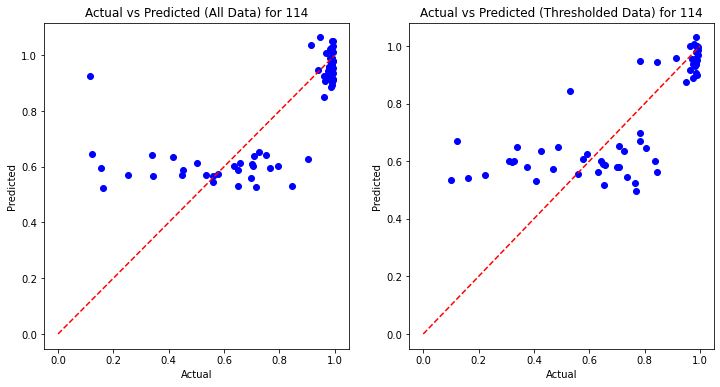

Frequency Point: 134
Test MSE: 0.0219, R²: 0.5928
Thresholded Test MSE: 0.0297, R²: 0.3597



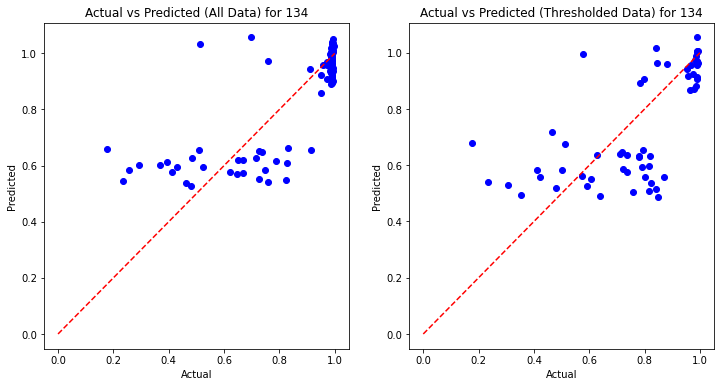

Frequency Point: 95
Test MSE: 0.0131, R²: 0.7192
Thresholded Test MSE: 0.0305, R²: 0.5520



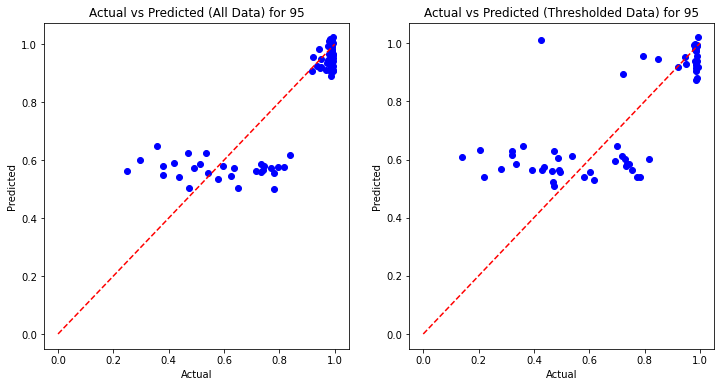

Frequency Point: 105
Test MSE: 0.0179, R²: 0.6770
Thresholded Test MSE: 0.0336, R²: 0.5621



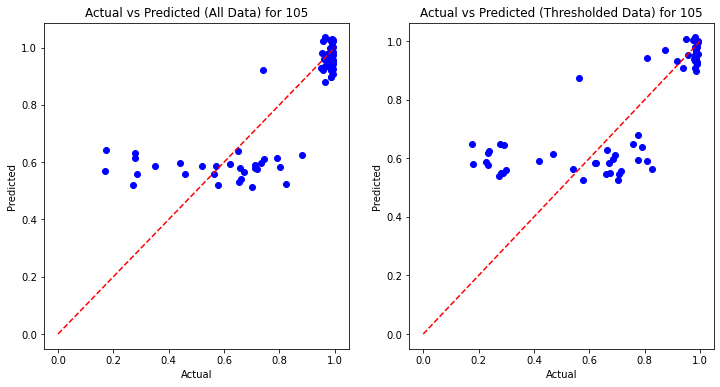

Frequency Point: 94
Test MSE: 0.0129, R²: 0.7200
Thresholded Test MSE: 0.0336, R²: 0.5154



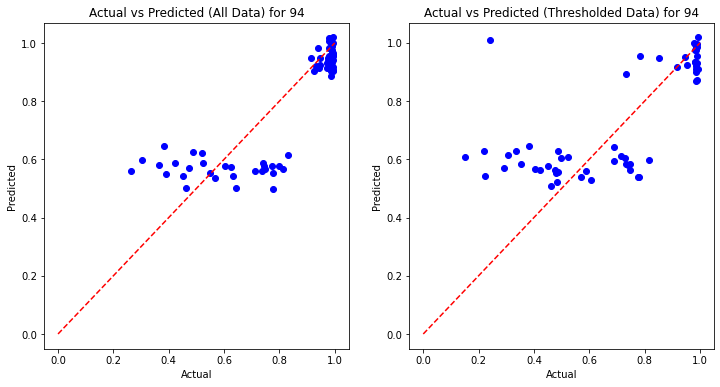

In [ ]:
# Choose specific frequency points to predict
frequency_points = [int(i) for i in top_freq_m2['Frequency'].values[6:].tolist()]
print(f"Selected Frequency Points: {frequency_points}")

X = design_params  # Features (design parameters)
threshold = 0.9 # Threshold for filtering out low magnitude values

# Delete the rows that has all freq points above the threshold
s11_magnitude_threshold = s11_magnitude[~(s11_magnitude > threshold).all(axis=1)]
X_threshold = X.loc[s11_magnitude_threshold.index]

print(f"Number of rows after thresholding: {len(X_threshold)} \n")
# Train and test linear regression on the selected frequency points
for freq in frequency_points:
    y = s11_magnitude.iloc[:, freq]
    y_threshold = s11_magnitude_threshold.iloc[:, freq]
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Split the thresholded data
    X_train_threshold, X_test_threshold, y_train_threshold, y_test_threshold = train_test_split(X_threshold, y_threshold, test_size=0.2, random_state=42)

    # Train linear regression models
    model = LinearRegression()
    model.fit(X_train, y_train)

    model_threshold = LinearRegression()
    model_threshold.fit(X_train_threshold, y_train_threshold)
    
    # Predict and evaluate on test set
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    y_pred_threshold = model_threshold.predict(X_test_threshold)
    mse_threshold = mean_squared_error(y_test_threshold, y_pred_threshold)
    r2_threshold = r2_score(y_test_threshold, y_pred_threshold)
    
    print(f"Frequency Point: {freq}")
    print(f"Test MSE: {mse:.4f}, R²: {r2:.4f}")
    print(f"Thresholded Test MSE: {mse_threshold:.4f}, R²: {r2_threshold:.4f}\n")
    
    # Plot actual vs predicted values for the test sets as subplot
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.scatter(y_test, y_pred, color='blue')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Actual vs Predicted (All Data) for {freq}')

    plt.subplot(1, 2, 2)
    plt.scatter(y_test_threshold, y_pred_threshold, color='blue')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Actual vs Predicted (Thresholded Data) for {freq}')

    plt.show()




## Final Insights for given questions
### PCA
- PCA can reduce the complexity by identifying the main geometric parameters influencing the S11 response. This reduces dimensionality while retaining most variance.
- The first 8 principal components explain 86.16% of the total variance. This indicates that a significant portion of the design space variability can be captured with fewer parameters.
- From PCA, we observe that certain geometric parameters (like length, width, and height) are likely primary influencers of the S11 response, given their higher correlations and contributions to the principal components. This suggests a relationship between geometry and electromagnetic performance.
### Regression
- By selecting key frequency points (like 114, 134, 95, 105, and 94) based on scoring the lowest magnitudes, the regression task is simplified. This focuses prediction efforts on critical points where S11 behavior is most relevant, such as resonance frequencies.
- Linear regression shows moderate success in predicting S11 at these points, with R² values ranging from approximately 0.5751 to 0.7200. This suggests some effectiveness but also highlights the complexity of modeling both real and imaginary S11 components.
- Linear regression reveals that certain frequency points (like 94 and 95) have higher R² values, possibly indicating stronger predictability for these frequencies. This suggests that specific design parameters might influence S11 more at certain frequencies.
### Model Performance and Interpretability
- PCA and regression are both useful but serve different roles. PCA is effective for dimensionality reduction, capturing key design parameters that explain most variance, while regression helps predict S11 at specific frequencies but with moderate accuracy.
- Both models may struggle with nonlinearity in S11 behavior. Using nonlinear models, like polynomial regression or machine learning methods, could improve predictive accuracy.